In [1]:
import os
from FeatureSelection import FeatureSelection
import pandas as pd
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.feature_extraction.text import  TfidfVectorizer
import matplotlib.pyplot as plt


bench=FeatureSelection("C",26150) #enter target category and the last id of the preffered train_set
#use relat-ive path
for csv in os.listdir("../testspace2/csvs"):
	data = pd.read_csv("../testspace2/csvs/"+csv, encoding = 'iso-8859-1')
	bench.split_data(data)


uniform_new_x_train=bench.uniform('daily',decision_thres=0.5,topk=1000)
# bench.rdf(topk=1000)
# rdf_new_x_train=bench.new_x_train
# bench.chi_squere(1000)
# chi2_new_x_train=bench.new_x_train



label_train=bench.y_train
label_test=bench.y_test
x_test=bench.x_test

vectorizer = TfidfVectorizer(lowercase=False).fit(uniform_new_x_train)

u_x = vectorizer.transform(uniform_new_x_train)
#r_x = vectorizer.fit_transform(rdf_new_x_train)
#c_x = vectorizer.fit_transform(chi2_new_x_train)
#TRAIN PHASE

clf = svm.LinearSVC().fit(u_x, label_train)



#TEST PHASE


array3=vectorizer.transform(x_test)
test_test_predict = clf.predict(array3)


conf_test = confusion_matrix(label_test, test_test_predict)


print(clf)
print("\n Test for daily uniform \n")
 
print ('accuracy', accuracy_score(label_test, test_test_predict))
print ('confusion matrix\n', confusion_matrix(label_test, test_test_predict))
print ('(row=expected, col=predicted)')
print(classification_report(label_test, test_test_predict))

plt.figure()
bench.plot_confusion_matrix(conf_test, classes="",
                      title='Confusion matrix, for class '+ bench.target_cat )

plt.show()

AttributeError: 'str' object has no attribute 'astype'

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Testttttt

accuracy 0.9217264081931237
confusion matrix
 [[1445  106]
 [ 108 1075]]
(row=expected, col=predicted)
             precision    recall  f1-score   support

          0       0.93      0.93      0.93      1551
          1       0.91      0.91      0.91      1183

avg / total       0.92      0.92      0.92      2734

Confusion matrix, without normalization
[[1445  106]
 [ 108 1075]]


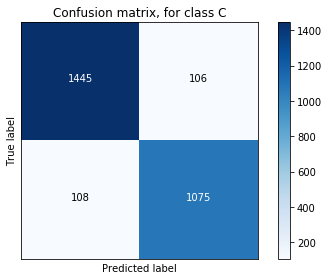

In [10]:
import os
from FeatureSelection import FeatureSelection
import pandas as pd
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.feature_extraction.text import  TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

bench=FeatureSelection("C",26150) #enter target category and the last id of the preffered train_set
#use relative path
for csv in os.listdir("../testspace2/csvs"):
    data = pd.read_csv("../testspace2/csvs/"+csv, encoding = 'iso-8859-1')
    bench.split_data(data)




# new_x_train=bench.uniform('single',decision_thres=0.5,topk=1000)
# bench.rdf(topk=1000)
# bench.uniform('single',decision_thres=0.5,topk=1000)
# bench.random_select(1000)
new_x_train=bench.x_train #for chi squere only


label_train=bench.y_train
label_test=bench.y_test
x_test=bench.x_test

vectorizer = TfidfVectorizer(lowercase=False)
n_x = vectorizer.fit_transform(new_x_train)

#uncomment the 2 lines below fo chi2 
ch2 = SelectKBest(chi2, k=1000)
n_x = ch2.fit_transform(n_x, label_train)



#TRAIN PHASE

clf = svm.LinearSVC().fit(n_x, label_train)






#TEST PHASEz
#uncomment the line below for chi2,comment the next 
array3=ch2.transform(vectorizer.transform(x_test))

# array3=vectorizer.transform(x_test)

test_test_predict = clf.predict(array3)


conf_test = confusion_matrix(label_test, test_test_predict)


print(clf)
print("\n Test for chi2 \n")
 
print ('accuracy', accuracy_score(label_test, test_test_predict))
print ('confusion matrix\n', confusion_matrix(label_test, test_test_predict))
print ('(row=expected, col=predicted)')
print(classification_report(label_test, test_test_predict))

plt.figure()
bench.plot_confusion_matrix(conf_test, classes="",
                      title='Confusion matrix, for class '+ bench.target_cat )

plt.show()

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Testttttt

accuracy 0.9001463057790783
confusion matrix
 [[1432  119]
 [ 154 1029]]
(row=expected, col=predicted)
             precision    recall  f1-score   support

          0       0.90      0.92      0.91      1551
          1       0.90      0.87      0.88      1183

avg / total       0.90      0.90      0.90      2734

Confusion matrix, without normalization
[[1432  119]
 [ 154 1029]]


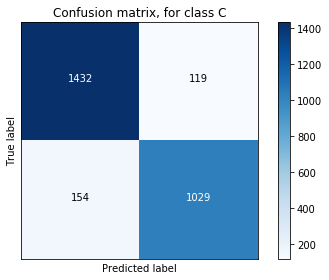

In [11]:
import os
from FeatureSelection import FeatureSelection
import pandas as pd
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.feature_extraction.text import  TfidfVectorizer
import matplotlib.pyplot as plt


bench=FeatureSelection("C",26150) #enter target category and the last id of the preffered train_set
#use relative path
for csv in os.listdir("../testspace2/csvs"):
	data = pd.read_csv("../testspace2/csvs/"+csv, encoding = 'iso-8859-1')
	bench.split_data(data)


uniform_new_x_train=bench.uniform('single',decision_thres=0.5,topk=1000)
# bench.rdf(topk=1000)
# rdf_new_x_train=bench.new_x_train
# bench.chi_squere(1000)
# chi2_new_x_train=bench.new_x_train



label_train=bench.y_train
label_test=bench.y_test
x_test=bench.x_test

vectorizer = TfidfVectorizer(lowercase=False).fit(uniform_new_x_train)

u_x = vectorizer.transform(uniform_new_x_train)
#r_x = vectorizer.fit_transform(rdf_new_x_train)
#c_x = vectorizer.fit_transform(chi2_new_x_train)
#TRAIN PHASE

clf = svm.LinearSVC().fit(u_x, label_train)



#TEST PHASE


array3=vectorizer.transform(x_test)
test_test_predict = clf.predict(array3)


conf_test = confusion_matrix(label_test, test_test_predict)


print(clf)
print("\n Test for single uniform \n")
 
print ('accuracy', accuracy_score(label_test, test_test_predict))
print ('confusion matrix\n', confusion_matrix(label_test, test_test_predict))
print ('(row=expected, col=predicted)')
print(classification_report(label_test, test_test_predict))

plt.figure()
bench.plot_confusion_matrix(conf_test, classes="",
                      title='Confusion matrix, for class '+ bench.target_cat )

plt.show()

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Testttttt

accuracy 0.7329919531821507
confusion matrix
 [[1089  462]
 [ 268  915]]
(row=expected, col=predicted)
             precision    recall  f1-score   support

          0       0.80      0.70      0.75      1551
          1       0.66      0.77      0.71      1183

avg / total       0.74      0.73      0.73      2734

Confusion matrix, without normalization
[[1089  462]
 [ 268  915]]


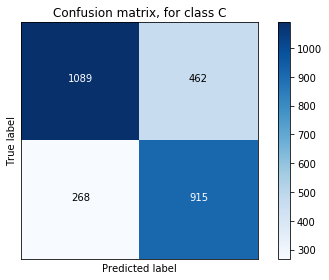

In [12]:
import os
from FeatureSelection import FeatureSelection
import pandas as pd
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.feature_extraction.text import  TfidfVectorizer
import matplotlib.pyplot as plt


bench=FeatureSelection("C",26150) #enter target category and the last id of the preffered train_set
#use relative path
for csv in os.listdir("../testspace2/csvs"):
	data = pd.read_csv("../testspace2/csvs/"+csv, encoding = 'iso-8859-1')
	bench.split_data(data)


new_x_train=bench.random_select(1000)
# bench.rdf(topk=1000)
# bench.uniform('single',decision_thres=0.5,topk=1000)
# bench.chi_squere(1000)
# bench.random_select(1000)




label_train=bench.y_train
label_test=bench.y_test
x_test=bench.x_test

vectorizer = TfidfVectorizer(lowercase=False).fit(new_x_train)

n_x = vectorizer.transform(new_x_train)
#r_x = vectorizer.fit_transform(rdf_new_x_train)
#c_x = vectorizer.fit_transform(chi2_new_x_train)
#TRAIN PHASE

clf = svm.LinearSVC().fit(n_x, label_train)



#TEST PHASE


array3=vectorizer.transform(x_test)
test_test_predict = clf.predict(array3)


conf_test = confusion_matrix(label_test, test_test_predict)


print(clf)
print("\n Test for random select\n")
 
print ('accuracy', accuracy_score(label_test, test_test_predict))
print ('confusion matrix\n', confusion_matrix(label_test, test_test_predict))
print ('(row=expected, col=predicted)')
print(classification_report(label_test, test_test_predict))

plt.figure()
bench.plot_confusion_matrix(conf_test, classes="",
                      title='Confusion matrix, for class '+ bench.target_cat )

plt.show()

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Test for rdf 

accuracy 0.7873569253386538
confusion matrix
 [[3701 1450]
 [ 575 3797]]
(row=expected, col=predicted)
             precision    recall  f1-score   support

          0       0.87      0.72      0.79      5151
          1       0.72      0.87      0.79      4372

avg / total       0.80      0.79      0.79      9523

Confusion matrix, without normalization
[[3701 1450]
 [ 575 3797]]


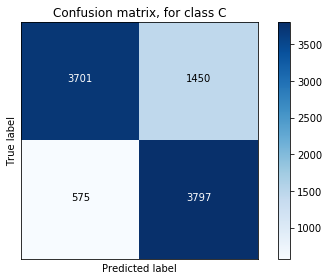

In [5]:
import os
from FeatureSelection import FeatureSelection
import pandas as pd
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.feature_extraction.text import  TfidfVectorizer
import matplotlib.pyplot as plt


bench=FeatureSelection("C",26150) #enter target category and the last id of the preffered train_set
#use relative path
for csv in os.listdir("../testspace2/csvs"):
	data = pd.read_csv("../testspace2/csvs/"+csv, encoding = 'iso-8859-1')
	bench.split_data(data)


new_x_train=bench.rdf(1000)
# bench.rdf(topk=1000)
# bench.uniform('single',decision_thres=0.5,topk=1000)
# bench.chi_squere(1000)
# bench.random_select(1000)




label_train=bench.y_train
label_test=bench.y_test
x_test=bench.x_test

vectorizer = TfidfVectorizer(lowercase=False).fit(new_x_train)

n_x = vectorizer.transform(new_x_train)
#r_x = vectorizer.fit_transform(rdf_new_x_train)
#c_x = vectorizer.fit_transform(chi2_new_x_train)
#TRAIN PHASE

clf = svm.LinearSVC().fit(n_x, label_train)



#TEST PHASE


array3=vectorizer.transform(x_test)
test_test_predict = clf.predict(array3)


conf_test = confusion_matrix(label_test, test_test_predict)


print(clf)
print("\nTest for rdf \n")
 
print ('accuracy', accuracy_score(label_test, test_test_predict))
print ('confusion matrix\n', confusion_matrix(label_test, test_test_predict))
print ('(row=expected, col=predicted)')
print(classification_report(label_test, test_test_predict))

plt.figure()
bench.plot_confusion_matrix(conf_test, classes="",
                      title='Confusion matrix, for class '+ bench.target_cat )

plt.show()